## Estimating Trend in the Absence of Seasonality

## Exponential Smoothing

Given a time series $\{X_t\}$ that has no seasonal component, we may model it as 
$$
    X_t = m_t + Y_t
$$
where $Y_t$ is iid noise with $E[Y_t] = 0$; and $m_t$ is the trend component. One way to estimate trend is to use exponential smoothing. For any fixed $\alpha \in [0, 1]$, one defines the one-sided moving averages $\hat{m}_t$, $1 \leq t \leq n$, as follows:
\begin{align}
    \hat{m}_1 & = X_1 \\
    \hat{m}_{t} & = \alpha X_t + (1 - \alpha) \hat{m}_{t - 1}  \ \ (2 \leq t \leq n)
\end{align}

In [41]:
import numpy as np
def estimate_trend(x, alpha):
    ret = np.ones(len(x))
    ret[0] = x[0]
    for t in np.arange(1, len(x), 1):
        first = [alpha * (1 - alpha)**j * x[t - j] for j in range(0, t)]
        ret[t] = np.sum(first) + (1 - alpha)**t * x[0]
    return list(ret)

In [42]:
alpha1 = 1
x1 = [1, 1, 1]
print(estimate_trend(x1, alpha1))

[1.0, 1.0, 1.0]


In [43]:
alpha2 = 0
x2 = [1, 2, 3, 4]
print(estimate_trend(x2, alpha2))

[1.0, 1.0, 1.0, 1.0]


In [44]:
x3 = [3 * t + np.random.normal(loc=0, scale=8, size=1) for t in range(0, 30)]

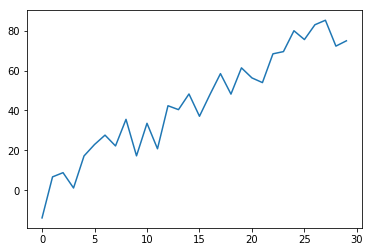

In [45]:
import matplotlib.pyplot as plt

plt.plot(range(0, 30), x3)
plt.show()

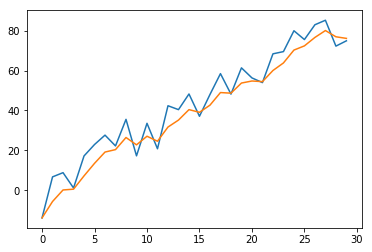

In [46]:
m1 = estimate_trend(x3, alpha=0.4)

plt.plot(range(0, 30), x3)
plt.plot(range(0, 30), m1)

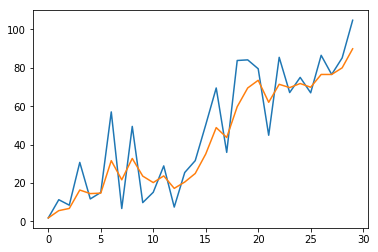

In [25]:
plt.plot(range(0, 30), x)
plt.plot(range(0, 30), m)

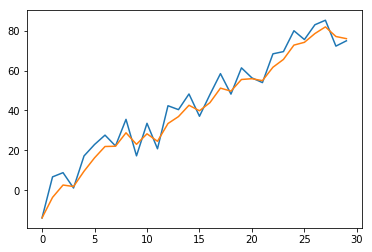

In [47]:
m2 = estimate_trend(x3, alpha=0.5)

plt.plot(range(0, 30), x3)
plt.plot(range(0, 30), m2)

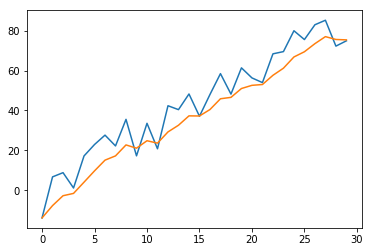

In [48]:
m3 = estimate_trend(x3, alpha=0.3)

plt.plot(range(0, 30), x3)
plt.plot(range(0, 30), m3)

## Trend Elimination by Differencing

In [86]:
z = [1 - 4 * t + 0.15 * t**2 - 0.00035 * t**3 + np.random.normal(loc=0, scale=25, size=1)[0] for t in range(0, 100)]

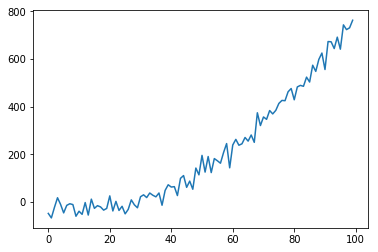

In [87]:
plt.plot(range(0, 100), z)
plt.show()

In [88]:
import pandas as pd

df = pd.DataFrame(columns=['z'])
df['z'] = z
df.head()

,z
0,-48.698005
1,-67.634101
2,-23.436924
3,17.130753
4,-10.890566


In [91]:
df['diff1'] = df['z'].diff(periods=1)
df['diff2'] = df['z'].diff(periods=2)
df['diff3'] = df['z'].diff(periods=3)

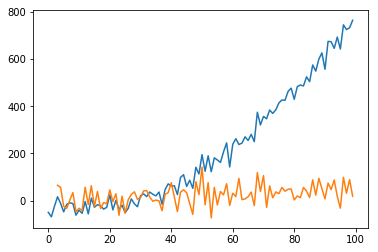

In [95]:
r = range(0, 100)
#plt.plot(r, df['diff1']) # degree 2 polynomial
plt.plot(r, z)
#plt.plot(r, df['diff2']) # degree 1 polynomial 
plt.plot(r, df['diff3']) # degree 0 polynomial